In [1]:
student_name = "fei lynch"
student_id = "44930062"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from geopy.distance import vincenty
tree = ET.parse('race1.gpx')
root = tree.getroot()

In [3]:
# define a namespace dictionary to make element names simpler
# this mirrors the namespace definintions in the XML files
ns = {'gpx':'http://www.topografix.com/GPX/1/1',
 'gpxtpx': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}


In [4]:
# when we look for elements, we need to use the namespace prefix
trk = root.find('gpx:trk', ns)
trkseg = trk.find('gpx:trkseg', ns)

In [5]:
# iterate over the first ten trkpt elements - the children of trkseg
data = []
for trkpt in trkseg[:]:
 
 lon = trkpt.attrib['lon']
 lat = trkpt.attrib['lat']
 # get values from the child elements
 ele = trkpt.find('gpx:ele', ns).text
 time = trkpt.find('gpx:time', ns).text
 # now dive into the extensions
 ext = trkpt.find('gpx:extensions', ns)
 power = ext.find('gpx:power', ns).text
 tpext = ext.find('gpxtpx:TrackPointExtension', ns)
 temp = tpext.find('gpxtpx:atemp', ns).text
 hrext = ext.find('gpxtpx:TrackPointExtension', ns)
 heartrate = hrext.find('gpxtpx:hr', ns).text
 cadext = ext.find('gpxtpx:TrackPointExtension', ns)
 cadence = cadext.find('gpxtpx:cad',ns).text

 row = ['TS', lat, lon, ele, time, power, temp, heartrate, cadence]
 data.append(row)        


race1_df = pd.DataFrame(data, columns = ['TS','lat', 'lon', 'ele','time','power','temp','heartrate', 'cadence',] )
#race1_df.head()
#race1_df.tail()
race1_df.shape
 

 

(6377, 9)

In [6]:
#  the last point - initialise to the value from the first row of the dataframe
lastrow = race1_df.iloc[0]
row = race1_df.iloc[1]

#  create a list of elevation differences, initialise to the empty list
ediffs = []
# iterate over the rows in the data frame using iterrows
for index, row in race1_df.iterrows():
   
    start = (lastrow['lat'], lastrow['lon'])
    end = (row['lat'], row['lon'])
    distance = vincenty(start, end).km
    # append to our list
    ediffs.append(distance)
    # update the last variable
    lastrow = row  

race1_df['distance'] = pd.DataFrame(ediffs, columns = ['distance'])
race1_df.head()

,TS,lat,lon,ele,time,power,temp,heartrate,cadence,distance
0,TS,-33.8161780,150.8710320,73.0,2017-07-08T22:05:45Z,0,7,115,27,0.000000
1,TS,-33.8161500,150.8710350,73.0,2017-07-08T22:05:46Z,0,7,115,27,0.003118
2,TS,-33.8161170,150.8710440,73.0,2017-07-08T22:05:47Z,0,7,115,27,0.003754
3,TS,-33.8160820,150.8710540,73.0,2017-07-08T22:05:48Z,0,7,115,27,0.003991
4,TS,-33.8160430,150.8710690,73.0,2017-07-08T22:05:49Z,197,7,115,27,0.004543


In [7]:
## as we can see the time interval is 1 second, therefore speed is same as distance
race1_df['speed'] = pd.DataFrame(ediffs, columns = ['distance'])

In [8]:
race1_df.head()

,TS,lat,lon,ele,time,power,temp,heartrate,cadence,distance,speed
0,TS,-33.8161780,150.8710320,73.0,2017-07-08T22:05:45Z,0,7,115,27,0.000000,0.000000
1,TS,-33.8161500,150.8710350,73.0,2017-07-08T22:05:46Z,0,7,115,27,0.003118,0.003118
2,TS,-33.8161170,150.8710440,73.0,2017-07-08T22:05:47Z,0,7,115,27,0.003754,0.003754
3,TS,-33.8160820,150.8710540,73.0,2017-07-08T22:05:48Z,0,7,115,27,0.003991,0.003991
4,TS,-33.8160430,150.8710690,73.0,2017-07-08T22:05:49Z,197,7,115,27,0.004543,0.004543


In [9]:
race1_df.distance.sum()

64.68822678337318

In [10]:
# converted time series
race1_df['time'] = pd.to_datetime(race1_df.time)
race1_df['time'].max()-race1_df['time'].min()

Timedelta('0 days 01:46:22')

In [16]:
# speed over the track is total distance(64.68822678337318)/total time(01:46:22=1.773 hours)
racel1_Avespeed = 64.69/1.773
#print(race1_Avespeed)

##  the average speed of the rider1 is 36.5km/hour

## Plot histograms showing the distribution of speed, heart rate and power over the course of the ride, work out std, mean, median for each data set then plot distribution graph.


In [17]:
speed = pd.Series(race1_df['speed'])
speed = speed.astype(float)
speed.describe()

count    6377.000000
mean        0.010144
std         0.001421
min         0.000000
25%         0.009316
50%         0.009990
75%         0.010816
max         0.036737
Name: speed, dtype: float64

In [18]:
speed = np.random.normal(0.010144,0.001421, 6377 )
np.mean(speed)

0.010165256882318801

<function matplotlib.pyplot.show>

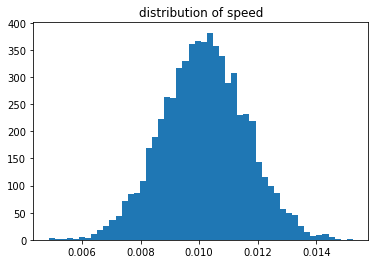

In [19]:
plt.figure()
plt.title('distribution of speed')
plt.hist(speed, 50)
plt.show

In [21]:
#distribution of heartrate
hr = pd.Series(race1_df['heartrate'])
hr = hr.astype(float)
hr.describe()

count    6377.000000
mean      157.167790
std        17.190663
min       108.000000
25%       148.000000
50%       154.000000
75%       160.000000
max       236.000000
Name: heartrate, dtype: float64

In [22]:
heartrate = np.random.normal(157.167790,17.190663, 6377 )
np.mean(heartrate)

156.9211012185402

<function matplotlib.pyplot.show>

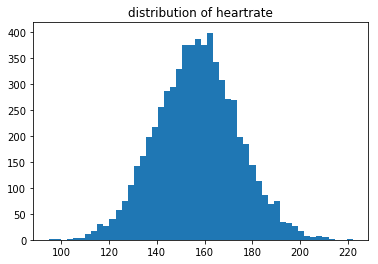

In [23]:
plt.figure()
plt.title('distribution of heartrate')
plt.hist(heartrate, 50)
plt.show

In [24]:
#distribution of power
p = pd.Series(race1_df['power'])
p = p.astype(float)
p.describe()

count    6377.000000
mean      216.071193
std       165.784207
min         0.000000
25%        82.000000
50%       214.000000
75%       304.000000
max       825.000000
Name: power, dtype: float64

In [25]:
power = np.random.normal(216.071193,165.784207, 6377 )
np.mean(power)

216.93310616068621

<function matplotlib.pyplot.show>

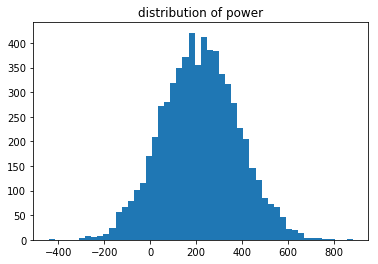

In [26]:
plt.figure()
plt.title('distribution of power')
plt.hist(power, 50)
plt.show

## Plot power vs speed and power vs heart rate 

In [27]:
race1_df.head()

,TS,lat,lon,ele,time,power,temp,heartrate,cadence,distance,speed
0,TS,-33.8161780,150.8710320,73.0,2017-07-08 22:05:45,0,7,115,27,0.000000,0.000000
1,TS,-33.8161500,150.8710350,73.0,2017-07-08 22:05:46,0,7,115,27,0.003118,0.003118
2,TS,-33.8161170,150.8710440,73.0,2017-07-08 22:05:47,0,7,115,27,0.003754,0.003754
3,TS,-33.8160820,150.8710540,73.0,2017-07-08 22:05:48,0,7,115,27,0.003991,0.003991
4,TS,-33.8160430,150.8710690,73.0,2017-07-08 22:05:49,197,7,115,27,0.004543,0.004543


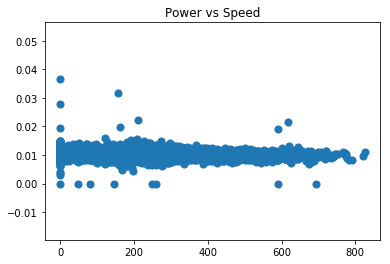

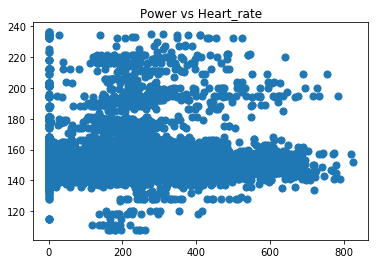

In [28]:
plt.title('Power vs Speed')
x=race1_df['power']
y=race1_df['speed']
plt.scatter(x=race1_df['power'],y=race1_df['speed'], s=50)
plt.show()


plt.title('Power vs Heart_rate')
plt.scatter(x=race1_df['power'],y=race1_df['heartrate'], s=50)
plt.show()

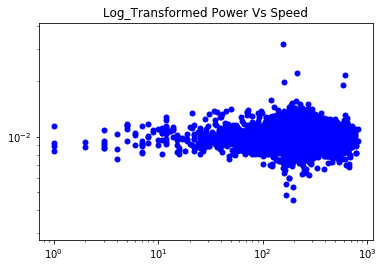

In [29]:
#Log_Transformed Power Vs Speed
fig = plt.figure()
plt.title('Log_Transformed Power Vs Speed')
ax = plt.gca()
ax.plot(race1_df['power'] ,race1_df['speed'], 'o', c='blue', alpha=3, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

## from graph 'Log_Transformed Power Vs Speed' we can clearly see power is increasing as speed is oscillating around  0.01 with a few big outliers,  it may be because you are riding up and down hills, it may also explain the graph'Power vs Heart_rate', as power is increasing and only 2/3 of the heart rate data increases while 1/3 heart rate data remains between 140-160, this may be explained due to downhill riding causing lower heart rates while accouting for increases in power.


## How many laps did the rider complete in the race?
## Answer: Counting the graph below there are 18 laps the rider completes.

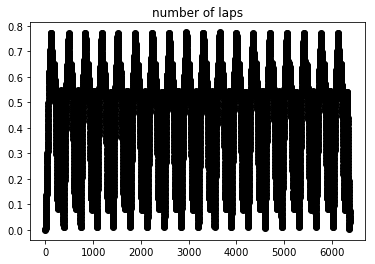

In [30]:
firstrow = race1_df.iloc[0]
row = race1_df.iloc[1]

#  create a list of elevation differences, initialise to the empty list
ediffs = []
# iterate over the rows in the data frame using iterrows
for index, row in race1_df.iterrows():
   
    start = (firstrow['lat'], firstrow['lon'])
    end = (row['lat'], row['lon'])
    distance = vincenty(start, end).km
    # append to our list
    ediffs.append(distance)
    # update the last variable
    lastrow = row  

race1_df['distance'] = pd.DataFrame(ediffs, columns = ['distance'])
race1_df.head()

plt.figure()
plt.title('number of laps')
plt.plot(race1_df.distance,'ko-')
plt.show()

## find the average speed of the rider in race2

In [31]:
tree = ET.parse('race2.gpx')
root = tree.getroot()

In [32]:
ns = {'gpx':'http://www.topografix.com/GPX/1/1',
 'gpxtpx': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}

In [33]:
trk = root.find('gpx:trk', ns)
trkseg = trk.find('gpx:trkseg', ns)

In [34]:
data = []
for trkpt in trkseg[:]:
 trkseg = trk.find('gpx:trkseg', ns)
 lon = trkpt.attrib['lon']
 lat = trkpt.attrib['lat']
 ele = trkpt.find('gpx:ele', ns).text
 row = ['TS', lat, lon, ele]
 data.append(row)        

race2_df = pd.DataFrame(data, columns = ['TS','lat', 'lon', 'ele'] )
race2_df.head()

,TS,lat,lon,ele
0,TS,-33.8162190,150.8710120,60.6
1,TS,-33.8161820,150.8710190,60.6
2,TS,-33.8161590,150.8710270,60.8
3,TS,-33.8161350,150.8710380,61.0
4,TS,-33.8161060,150.8710510,60.8


In [35]:
#  the last point - initialise to the value from the first row of the dataframe
lastrow = race2_df.iloc[0]
row = race2_df.iloc[1]

#  create a list of elevation differences, initialise to the empty list
ediffs = []
# iterate over the rows in the data frame using iterrows
for index, row in race2_df.iterrows():
   
    start = (lastrow['lat'], lastrow['lon'])
    end = (row['lat'], row['lon'])
    distance = vincenty(start, end).km
    # append to our list
    ediffs.append(distance)
    # update the last variable
    lastrow = row  

race2_df['distance'] = pd.DataFrame(ediffs, columns = ['distance'])
race2_df.head()

,TS,lat,lon,ele,distance
0,TS,-33.8162190,150.8710120,60.6,0.000000
1,TS,-33.8161820,150.8710190,60.6,0.004155
2,TS,-33.8161590,150.8710270,60.8,0.002656
3,TS,-33.8161350,150.8710380,61.0,0.002850
4,TS,-33.8161060,150.8710510,60.8,0.003434


In [36]:
race2_df.shape

(6896, 5)

In [37]:
race2_df.distance.sum()

71.95209967514933

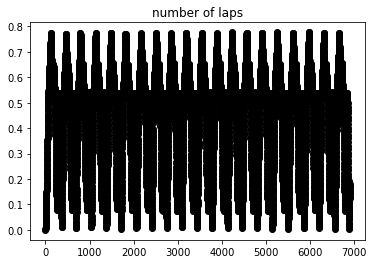

In [38]:
firstrow = race2_df.iloc[0]
row = race2_df.iloc[1]

#  create a list of elevation differences, initialise to the empty list
ediffs = []
# iterate over the rows in the data frame using iterrows
for index, row in race2_df.iterrows():
   
    start = (firstrow['lat'], firstrow['lon'])
    end = (row['lat'], row['lon'])
    distance = vincenty(start, end).km
    # append to our list
    ediffs.append(distance)
    # update the last variable
    lastrow = row  

race2_df['distance'] = pd.DataFrame(ediffs, columns = ['distance'])
race2_df.head()

plt.figure()
plt.title('number of laps')
plt.plot(race2_df.distance,'ko-')
plt.show()

## Second rider complete 20 laps

## assumption: assume both riders take the same amount of time to complete the race, rider2 is faster than rider1, because rider2 is riding 20 laps equal to 72km, while at the same time rider1 only completes 18 laps totalling 65km.

In [39]:
## race1_speed = 64.68822678337318/1.773 = 
racel2_Avespeed = 72/1.773
print(racel2_Avespeed )

40.609137055837564


# the average speed of the rider1 is 36.5km/hour
# the average speed of the rider2 is 40.6km/hour
# the rider2 is 4.1km/hour faster than rider1

## Work out the time taken for each lap in the race by each rider
# rider1_time = 106.38/18 = 5.91mins/lap
# rider2_time = 106.38/20 = 5.32 mins/lap

# END